In [1]:
import pandas as pd
import os
import networkx as nx
import numpy as np

In [4]:
ROOTFOLDER = "D:/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data"
CURATED_FOLDER = f"{ROOTFOLDER}/_curated/c_classifier"
df = pd.read_csv(f"{CURATED_FOLDER}/c_classifier_matrix.csv", index_col=0)
df.head()


,Accra,Amsterdam,Antwerp,Astrakhan,Athens,Auckland,Bacolod,Bangalore,Bangkok,Belgrade,...,Toronto,Tyumen,Valledupar,Victoria,Vienna,Vijayawada,Warsaw,Wellington,Yamaguchi,Zwolle
Accra,983.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Amsterdam,0.0,594.0,24.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,...,0.0,2.0,0.0,0.0,5.0,0.0,8.0,1.0,0.0,237.0
Antwerp,0.0,17.0,739.0,2.0,0.0,0.0,0.0,0.0,1.0,5.0,...,0.0,0.0,0.0,2.0,10.0,0.0,21.0,0.0,0.0,18.0
Astrakhan,0.0,0.0,1.0,959.0,0.0,0.0,0.0,0.0,1.0,5.0,...,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Athens,0.0,0.0,0.0,4.0,778.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [ ]:
# build directed graph from the matrix, use the value as the weight of the edge
G = nx.DiGraph()

In [24]:
# build directed graph from the matrix, use the value as the weight of the edge
G = nx.Graph()
for i in df.columns:
    print(i)
    for j in df.columns:
        if i != j and df.loc[i, j] > 0:
            print(j)
            G.add_edge(i, j, weight=df.loc[i, j])

# add attribute to the nodes
nx.set_node_attributes(G, dict(G.degree()), name = 'degree')
nx.set_node_attributes(G, dict(G.degree(weight='weight')), name = 'weighted_degree')
nx.set_node_attributes(G, nx.betweenness_centrality(G), name = 'betweenness')

Accra
Cirebon
Gaborone
Jakarta
Kampala
Lagos
Lima
Madrid
Nairobi
Palmas
Rajshahi
Tel Aviv
Amsterdam
Antwerp
Athens
Auckland
Bacolod
Belgrade
Berlin
Brussels
Budapest
Buenos Aires
Capetown
Chicago
Copenhagen
Dzerzhinsk
Florianopolis
Gainesville, FL
Istanbul
Johannesburg
Le Mans
London
Madrid
Manchester
Medan
Milan
Munich
Palembang
Paris
Philadelphia
Portland, OR
Reynosa
Rome
Rovno
Saint Petersburg
Sheffield
Stockholm
Taipei
Thessaloniki
Tyumen
Vienna
Warsaw
Wellington
Zwolle
Antwerp
Amsterdam
Astrakhan
Bangkok
Belgrade
Berlin
Brussels
Budapest
Buenos Aires
Chicago
Cleveland
Copenhagen
Denver
Dzerzhinsk
Hong Kong
Houston
Istanbul
Jakarta
Johannesburg
Kuala Lumpur
Kyiv
Le Mans
London
Madrid
Manchester
Milan
Minneapolis
Montreal
Moscow
Munich
New York
Paris
Philadelphia
Portland, OR
Quito
Raleigh
Reynosa
Rome
Saint Petersburg
San Francisco
Santiago
Sheffield
Singapore
Stockholm
Taipei
Tel Aviv
Thessaloniki
Toledo
Victoria
Vienna
Warsaw
Zwolle
Astrakhan
Antwerp
Bangkok
Belgrade
Chicago
Coch

In [17]:
# for node, data in G.nodes(data = True):
#     print(node)
#     print(G.nodes[node]['weighted_degree'])
#     data['node_identifier'] = node
#     data['betweenness'] = G.nodes[node]['betweenness']
#     data['degree'] = G.nodes[node]['degree']
#     data['weighted_degree'] = G.nodes[node]['weighted_degree']

In [86]:
df.loc['Boston', ].sort_values(ascending=False).head(10)

Boston           640.0
New York          88.0
Philadelphia      44.0
Raleigh           25.0
Montreal          24.0
Toronto           20.0
Portland, OR      13.0
Minneapolis       13.0
Victoria          13.0
San Francisco     11.0
Name: Boston, dtype: float64

In [87]:
df.loc['Mumbai', ].sort_values(ascending=False).head(10)

Mumbai            980.0
Delhi              11.0
Pune                3.0
Rio de Janeiro      2.0
Kaunas              1.0
Taipei              1.0
Bangalore           1.0
Kanpur              1.0
Accra               0.0
Palembang           0.0
Name: Mumbai, dtype: float64

In [88]:
df.loc['Hong Kong', ].sort_values(ascending=False).head(10)

Hong Kong        804.0
Taipei            43.0
Singapore         16.0
Cebu City         12.0
Kuala Lumpur      11.0
Bangkok           10.0
Florianopolis      8.0
Dhaka              5.0
Palermo            4.0
Seoul              4.0
Name: Hong Kong, dtype: float64

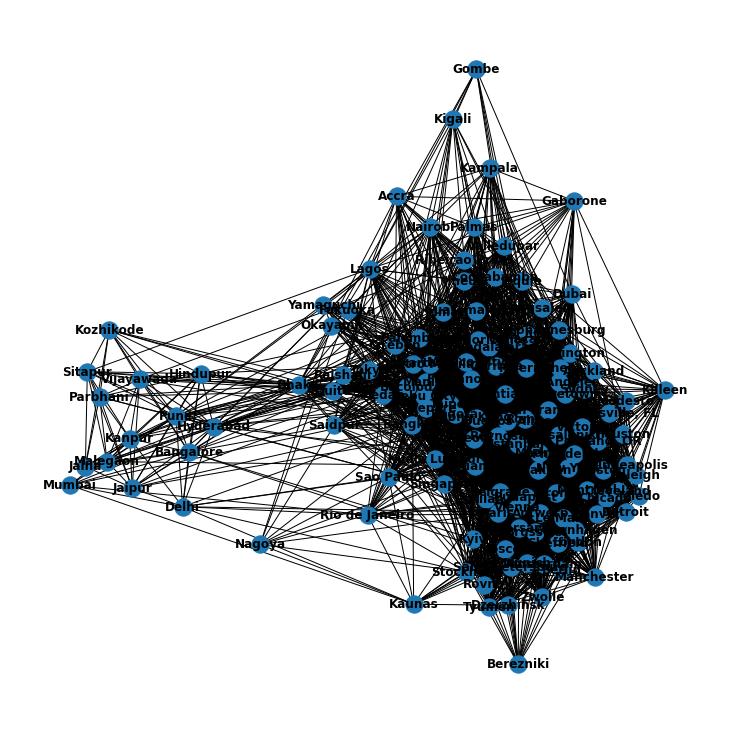

In [30]:
import matplotlib.pyplot as plt
# plot the graph larger
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, font_weight='bold')


In [69]:
# create communities with the graph
from networkx.algorithms import community
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    return max(centrality, key=centrality.get)

communities = list(community.girvan_newman(G, most_valuable_edge=most_central_edge))
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)



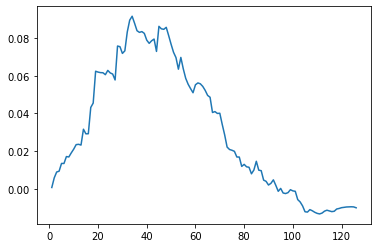

In [82]:
# plot the modularity
plt.plot(modularity_df.k, modularity_df.modularity)

In [70]:
# function to create node colour list
def create_community_node_colors(graph, communities):
    import random
    number_of_colors = len(communities)
    print(number_of_colors)
    
    # generate random hex colors based on number of colors
    color_random = random.sample(range(0, 16777215), number_of_colors)
    colors = [f"#{i:06x}" for i in color_random]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

37


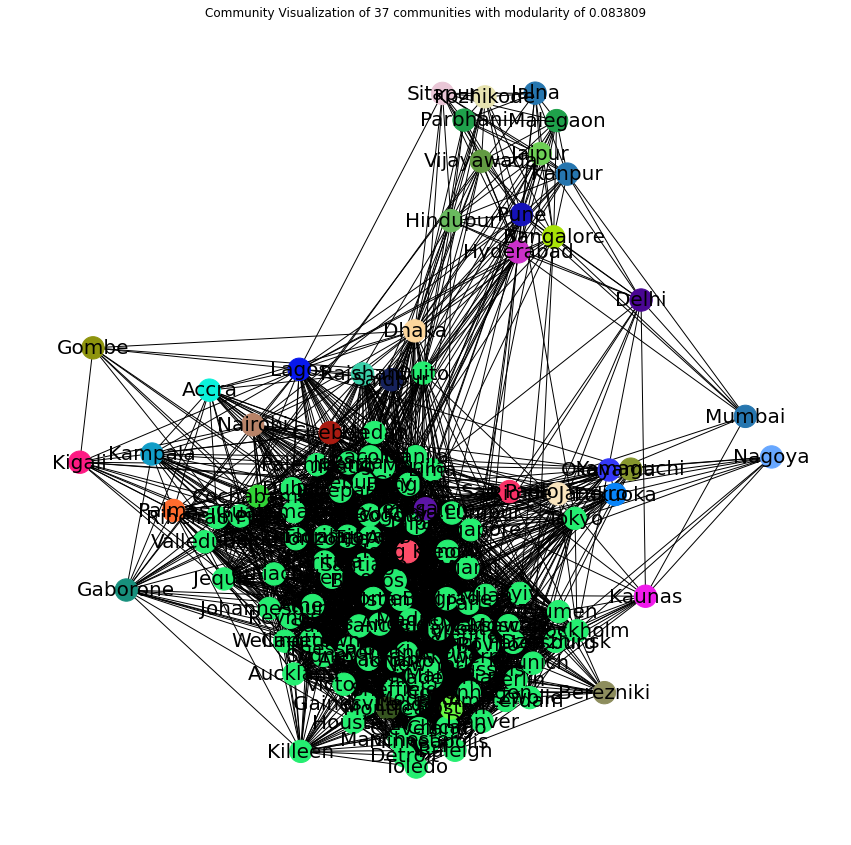

In [84]:
# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.5, iterations=50, seed=1)
    # plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=500,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(1, figsize=(15, 15))

# Plot graph with colouring based on communities
# visualize_communities(G, communities[0], 1)
# visualize_communities(G, communities[3], 2)
visualize_communities(G, communities[35])


In [ ]:
df_summary = data_des[variables_remain+["class"]].groupby("class").mean().stack().reset_index()\
.rename(columns = {"level_1":"variable", 0:"std_value"})
# re-normalize the mean value for visualization usage
df_summary["std_value"] = df_summary.groupby("variable").apply(lambda x: (x["std_value"] - x["std_value"].min())/(x["std_value"].max() - x["std_value"].min())).reset_index(drop=True)["std_value"]